In [1]:
from keras.models import load_model
import pickle

Using TensorFlow backend.


In [2]:
pickle_in = open("Downloads/tokenizer.pkl","rb")
tokenizer = pickle.load(pickle_in)

In [3]:
model = load_model('Downloads/model.h5')

In [4]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16
from keras.models import Model

vgg = VGG16()
vgg.layers.pop()
vgg = Model(inputs=vgg.inputs, outputs=vgg.layers[-1].output)
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 42)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 42, 256)      1478400     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 

In [6]:
img_file = 'Downloads/Image.png'
img_file1 = 'Downloads/image1.jpg'
img_file2 = 'Downloads/image2.jpg'
img_file3 = 'Downloads/image3.jpg'

In [7]:
img = load_img(img_file, target_size=(224, 224))
img1 = load_img(img_file1, target_size=(224, 224))
img2 = load_img(img_file2, target_size=(224, 224))
img3 = load_img(img_file3, target_size=(224, 224))

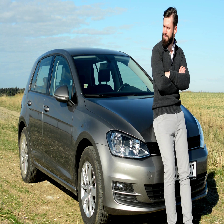

In [8]:
img

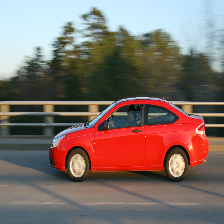

In [9]:
img1

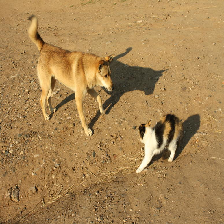

In [10]:
img2

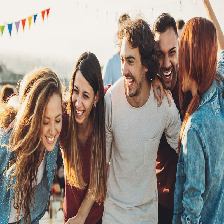

In [11]:
img3

In [12]:
img = img_to_array(img)
img1 = img_to_array(img1)
img2 = img_to_array(img2)
img3 = img_to_array(img3)

In [13]:
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img1 = img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))
img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))
img3 = img3.reshape((1, img3.shape[0], img3.shape[1], img3.shape[2]))

In [14]:
from keras.applications.vgg16 import preprocess_input

In [15]:
img = preprocess_input(img)
img1 = preprocess_input(img1)
img2 = preprocess_input(img2)
img3 = preprocess_input(img3)

In [16]:
image = vgg.predict(img, verbose=0)
image1 = vgg.predict(img1, verbose=0)
image2 = vgg.predict(img2, verbose=0)
image3 = vgg.predict(img3, verbose=0)

In [17]:
from keras.preprocessing.sequence import pad_sequences
from numpy import argmax

In [18]:
def predict_caption(model, image, tokenizer):
    initial_text = 'start'
    max_length = 43

    while True:
        encoded = tokenizer.texts_to_sequences([initial_text])
        padded = pad_sequences(encoded, maxlen=max_length-1, padding='pre')
        yhat = model.predict([image, padded], verbose=0)
        yhat = argmax(yhat)
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                next_word = word
                
        if next_word is None:
            break
        
        initial_text += ' ' + next_word
    
        if next_word == 'end':
            break
        
    initial_text = initial_text.split()
    initial_text = initial_text[1:-1]
    initial_text = ' '.join(initial_text)
        
    return initial_text

In [19]:
predict_caption(model, image, tokenizer)

'man in black shirt and jeans is sitting on bench'

In [23]:
predict_caption(model, image1, tokenizer) #It is unable to make anything out of the picture and so it gives the previous caption 

'man in black shirt and jeans is sitting on bench'

In [24]:
predict_caption(model, image2, tokenizer)

'two dogs are playing with toy'

In [25]:
predict_caption(model, image3, tokenizer)

'man in blue shirt and jeans is sitting on chair overlooking the phone'